## Import Library

In [ ]:
# Import library yang diperlukan
import os  # Berinteraksi dengan sistem operasi
import matplotlib.pyplot as plt # Library untuk plotting (visualisasi data)
import matplotlib.image as mpimg # Membaca dan memanipulasi data gambar
import cv2 # Library OpenCV untuk visi komputer
import shutil # Operasi file tingkat tinggi (copy, move)
import random # Generator angka acak
import tensorflow as tf # Library Machine Learning (Google)
import numpy as np # Komputasi numerik dengan array
import seaborn as sns # Visualisasi data statistik (berdasarkan matplotlib)
import zipfile # Bekerja dengan file ZIP
from sklearn.model_selection import train_test_split # Membagi dataset (training/testing)
from sklearn.metrics import confusion_matrix, classification_report # Evaluasi model klasifikasi
from sklearn.model_selection import KFold # Mengimpor KFold untuk cross-validation
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Augmentasi data gambar
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Layer-layer CNN Keras
from tensorflow.keras.preprocessing import image # Memuat dan memproses gambar
from tensorflow.keras.applications import MobileNetV2 # Model pre-trained MobileNetV2
from tensorflow.keras import layers, models # Komponen Keras untuk membangun model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint # Callback untuk pelatihan model
from PIL import Image, ImageDraw, ImageOps # Library Pillow untuk pengolahan gambar

## Load Data

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub # Mengimpor library
tiaswinsetiawan_cframe_fixed_path = kagglehub.dataset_download('tiaswinsetiawan/cframe-fixed')  # Mengunduh dataset dari KaggleHub

print('Data source import complete.')  # Menampilkan output ke konsol

Data source import complete.


## Dataset Analysis & Preview

Folder yang ditemukan: ['Star Seller', 'Underrated']
Jumlah gambar di folder "Star Seller": 915


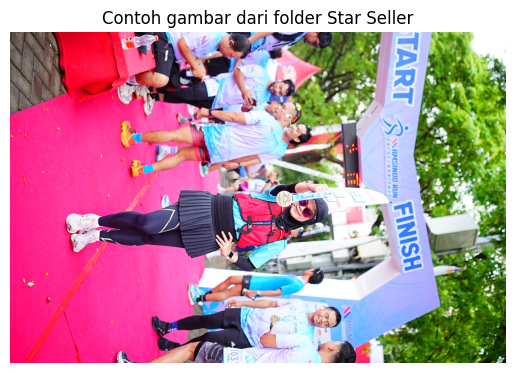

Jumlah gambar di folder "Underrated": 916


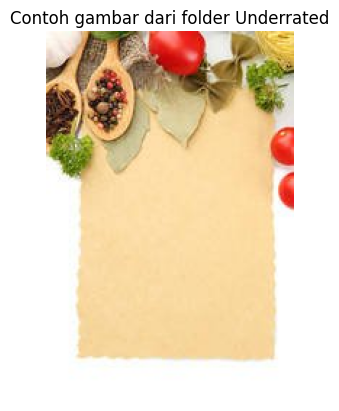

In [ ]:
# Base path ke dataset Anda
# Gunakan path yang dikembalikan oleh kagglehub.dataset_download
base_path = tiaswinsetiawan_cframe_fixed_path # Menyimpan path dasar dataset

# List folder di dalam base_path (misal dua folder kelas atau kategori)
folders = os.listdir(base_path) # Mendapatkan daftar folder/file di path dasar
print(f'Folder yang ditemukan: {folders}') # Menampilkan nama-nama folder

# Ambil gambar dari masing-masing folder
for folder in folders: # Loop melalui setiap folder
    folder_path = os.path.join(base_path, folder) # Membuat path lengkap ke folder
    # Pastikan itu adalah direktori sebelum mencoba listing isinya
    if os.path.isdir(folder_path): # Memeriksa apakah path adalah direktori
        images = os.listdir(folder_path) # Mendapatkan daftar file di dalam folder
        print(f'Jumlah gambar di folder "{folder}": {len(images)}') # Menampilkan jumlah gambar per folder

        # Muat dan tampilkan gambar pertama sebagai contoh
        if len(images) > 0: # Memeriksa apakah ada gambar di folder
            # Filter hanya file gambar (opsional, tapi disarankan)
            valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif') # Daftar ekstensi gambar yang valid
            image_files = [img for img in images if img.lower().endswith(valid_extensions)] # Memfilter hanya file gambar

            if len(image_files) > 0: # Memeriksa apakah ada file gambar setelah filtering
                image_path = os.path.join(folder_path, image_files[0]) # Mendapatkan path gambar pertama
                try:
                    image = Image.open(image_path) # Membuka gambar menggunakan Pillow
                    plt.imshow(image) # Menampilkan gambar
                    plt.title(f'Contoh gambar dari folder {folder}') # Menambahkan judul pada gambar
                    plt.axis('off') # Menyembunyikan sumbu
                    plt.show() # Menampilkan plot gambar
                except Exception as e:
                    print(f"Could not open image {image_path}: {e}") # Menangani error jika gambar tidak bisa dibuka
            else:
                print(f"Tidak ada file gambar yang valid di folder {folder}") # Pesan jika tidak ada file gambar yang valid

##Data Preprocesing

**Resize Image**

Folder yang ditemukan: ['Star Seller', 'Underrated']
Jumlah gambar di folder "Star Seller": 915
Gambar: SDK08604.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: SDK08535.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: SDK06194.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: Screenshot 2025-01-25 125607.png | Ukuran asli: (484, 696) | Ukuran baru: (224, 224)
Gambar: SDK06085.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: SDK06784.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: SDK06241.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: Screenshot 2025-01-24 144809.png | Ukuran asli: (488, 699) | Ukuran baru: (224, 224)
Gambar: SDK05733.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: SDK07075.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: SDK06463.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: SDK06172.JPG | Ukuran asli: (4240, 

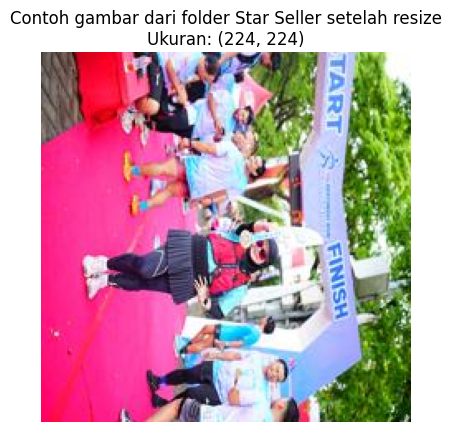

Jumlah gambar di folder "Underrated": 916
Gambar: 1269.jpg | Ukuran asli: (171, 255) | Ukuran baru: (224, 224)
Gambar: 771.jpg | Ukuran asli: (384, 256) | Ukuran baru: (224, 224)
Gambar: SDK08385.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: SDK08420.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: 1833.jpg | Ukuran asli: (383, 256) | Ukuran baru: (224, 224)
Gambar: 1749.jpg | Ukuran asli: (278, 256) | Ukuran baru: (224, 224)
Gambar: 1995.jpg | Ukuran asli: (382, 256) | Ukuran baru: (224, 224)
Gambar: 24267.jpg | Ukuran asli: (150, 150) | Ukuran baru: (224, 224)
Gambar: 1971.jpg | Ukuran asli: (384, 256) | Ukuran baru: (224, 224)
Gambar: 1383.jpg | Ukuran asli: (169, 255) | Ukuran baru: (224, 224)
Gambar: SDK08352.JPG | Ukuran asli: (4240, 2832) | Ukuran baru: (224, 224)
Gambar: 333.jpg | Ukuran asli: (341, 256) | Ukuran baru: (224, 224)
Gambar: 537.jpg | Ukuran asli: (292, 256) | Ukuran baru: (224, 224)
Gambar: 45.jpg | Ukuran asli: (341, 256) | Uk

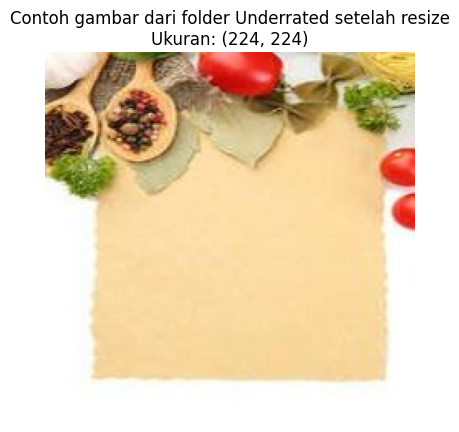

Proses resize selesai dan ukuran gambar telah ditampilkan.


In [ ]:
base_path = tiaswinsetiawan_cframe_fixed_path
output_base_path = '/kaggle/working/resized_images'  # folder writable untuk menyimpan hasil resize
os.makedirs(output_base_path, exist_ok=True) # Membuat direktori output jika belum ada

target_size = (224, 224) # Ukuran target untuk resize gambar
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif') # Ekstensi file gambar yang valid

folders = os.listdir(base_path) # Mendapatkan daftar folder dalam dataset
print(f'Folder yang ditemukan: {folders}') # Menampilkan nama folder yang ditemukan

for folder in folders: # Loop melalui setiap folder (kelas)
    folder_path = os.path.join(base_path, folder) # Path ke folder kelas saat ini
    output_folder = os.path.join(output_base_path, folder) # Path output untuk folder kelas saat ini
    os.makedirs(output_folder, exist_ok=True) # Membuat direktori output untuk kelas saat ini
    images = os.listdir(folder_path) # Mendapatkan daftar file dalam folder kelas
    print(f'Jumlah gambar di folder "{folder}": {len(images)}') # Menampilkan jumlah gambar

    for image_file in images: # Loop melalui setiap file dalam folder
        if not image_file.lower().endswith(valid_extensions): # Memeriksa apakah file adalah gambar
            print(f"Skip non-image file: {image_file}") # Lewati jika bukan file gambar
            continue

        image_path = os.path.join(folder_path, image_file) # Path lengkap ke gambar input
        output_image_path = os.path.join(output_folder, image_file) # Path lengkap untuk menyimpan gambar hasil resize
        try:
            image = Image.open(image_path).convert('RGB') # Membuka gambar dan mengonversi ke RGB
            original_size = image.size  # ukuran asli (width, height) # Mendapatkan ukuran asli gambar

            resized_image = image.resize(target_size) # Melakukan resize gambar
            resized_image.save(output_image_path)  # simpan di folder writable # Menyimpan gambar hasil resize

            print(f'Gambar: {image_file} | Ukuran asli: {original_size} | Ukuran baru: {resized_image.size}') # Menampilkan informasi ukuran
        except Exception as e:
            print(f"Error processing image {image_path} : {e}") # Menangani error saat memproses gambar

    # Tampilkan contoh gambar hasil resize
    valid_images = [img for img in images if img.lower().endswith(valid_extensions)] # Mendapatkan daftar file gambar yang valid
    if len(valid_images) > 0: # Memeriksa apakah ada gambar valid
        sample_image = Image.open(os.path.join(output_folder, valid_images[0])) # Membuka contoh gambar hasil resize
        plt.imshow(sample_image) # Menampilkan gambar
        plt.title(f'Contoh gambar dari folder {folder} setelah resize\nUkuran: {sample_image.size}') # Menambahkan judul
        plt.axis('off') # Menyembunyikan sumbu
        plt.show() # Menampilkan plot

print("Proses resize selesai dan ukuran gambar telah ditampilkan.") # Pesan penyelesaian proses

##Split Data

In [ ]:
# Path ke direktori dataset hasil resize
dataset_dir = "/kaggle/working/resized_images"  # Sesuaikan ini jika folder hasil resize berbeda
classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))] # Mendapatkan daftar nama folder (kelas) dalam direktori dataset

# Rasio pembagian data
train_ratio = 0.8 # Rasio untuk data training
val_ratio = 0.1 # Rasio untuk data validation
test_ratio = 0.1 # Rasio untuk data testing

# Membuat folder train, val, dan test jika belum ada
for folder_name in ["train", "val", "test"]: # Loop melalui nama folder subset
    os.makedirs(os.path.join(dataset_dir, folder_name), exist_ok=True) # Membuat direktori untuk subset

# Proses setiap kelas/folder kategori
for class_name in classes: # Loop melalui setiap nama kelas
    class_dir = os.path.join(dataset_dir, class_name) # Path ke direktori kelas saat ini

    # Periksa apakah ini direktori (bukan file)
    if os.path.isdir(class_dir): # Memeriksa apakah path adalah direktori
        files = os.listdir(class_dir) # Mendapatkan daftar file dalam direktori kelas
        random.shuffle(files) # Mengacak urutan file

        num_files = len(files) # Mendapatkan jumlah total file dalam kelas

        # Pastikan cukup file untuk split
        if num_files < 3: # Memeriksa apakah jumlah file cukup untuk dibagi
            print(f"Tidak cukup gambar di kelas {class_name} untuk dibagi menjadi train, val, dan test.") # Pesan jika tidak cukup file
            continue # Lanjut ke kelas berikutnya

        num_train = max(1, int(num_files * train_ratio)) # Menghitung jumlah file untuk training, minimal 1
        num_val = max(1, int(num_files * val_ratio)) # Menghitung jumlah file untuk validation, minimal 1
        num_test = num_files - num_train - num_val # Menghitung jumlah file untuk testing

        # Koreksi agar semua subset tidak kosong
        if num_test < 1: # Memeriksa jika subset test kosong
            num_test = 1 # Set jumlah test minimal 1
            num_val = num_files - num_train - num_test # Sesuaikan jumlah validation

        if num_val < 1: # Memeriksa jika subset validation kosong
            num_val = 1 # Set jumlah validation minimal 1
            num_test = num_files - num_train - num_val # Sesuaikan jumlah test

        # Membagi file menjadi train, val dan test
        train_files = files[:num_train] # Mengambil file untuk training
        val_files = files[num_train:num_train + num_val] # Mengambil file untuk validation
        test_files = files[num_train + num_val:] # Mengambil file untuk testing

        # Memindahkan file ke folder sesuai pembagian
        for folder_name, file_list in [("train", train_files), ("val", val_files), ("test", test_files)]: # Loop melalui subset dan daftar filenya
            folder_path = os.path.join(dataset_dir, folder_name, class_name) # Path tujuan untuk file subset
            os.makedirs(folder_path, exist_ok=True) # Membuat direktori tujuan jika belum ada

            for file in file_list: # Loop melalui setiap file dalam daftar subset
                src = os.path.join(class_dir, file) # Path sumber file
                dst = os.path.join(folder_path, file) # Path tujuan file
                shutil.move(src, dst) # Memindahkan file

print("Proses split dataset selesai.")  # Menampilkan output ke konsol

Proses split dataset selesai.


**Augmentasi Data**

In [ ]:
# Directory paths sesuai hasil split di Kaggle
train_dir = '/kaggle/working/resized_images/train'
val_dir = '/kaggle/working/resized_images/val'
test_dir = '/kaggle/working/resized_images/test'

# Ukuran gambar yang sesuai input MobileNetV2
img_size = 224
batch_size = 32

# Data augmentation untuk data training
train_datagen = ImageDataGenerator(
    rescale=1./255, # Menskalakan nilai piksel gambar ke rentang [0, 1]
    rotation_range=40, # Memutar gambar secara acak hingga 40 derajat
    width_shift_range=0.2, # Menggeser gambar secara horizontal hingga 20% dari lebar total
    height_shift_range=0.2, # Menggeser gambar secara vertikal hingga 20% dari tinggi total
    shear_range=0.2, # Menerapkan transformasi geser (shear) hingga 20%
    zoom_range=0.2, # Menerapkan zoom acak hingga 20%
    horizontal_flip=True, # Membalik gambar secara horizontal secara acak
    fill_mode='nearest' # Mengisi piksel yang baru dibuat setelah transformasi menggunakan nilai piksel terdekat
)

# Tidak ada augmentation untuk validation dan test, hanya rescale
val_datagen = ImageDataGenerator(rescale=1./255) # Hanya menskalakan piksel

# Membaca gambar dari direktori menggunakan flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir, # Direktori data training
    target_size=(img_size, img_size), # Mengubah ukuran semua gambar menjadi ukuran target
    batch_size=batch_size, # Ukuran batch untuk training
    class_mode='categorical' # Menentukan mode pengembalian label (one-hot encoding)
)

val_generator = val_datagen.flow_from_directory(
    val_dir, # Direktori data validation
    target_size=(img_size, img_size), # Mengubah ukuran semua gambar menjadi ukuran target
    batch_size=batch_size, # Ukuran batch untuk validation
    class_mode='categorical' # Menentukan mode pengembalian label (one-hot encoding)
)

test_generator = val_datagen.flow_from_directory(
    test_dir, # Direktori data test
    target_size=(img_size, img_size), # Mengubah ukuran semua gambar menjadi ukuran target
    batch_size=batch_size, # Ukuran batch untuk test
    class_mode='categorical' # Menentukan mode pengembalian label (one-hot encoding)
)

Found 1464 images belonging to 2 classes.
Found 182 images belonging to 2 classes.
Found 185 images belonging to 2 classes.


## Modelling

In [ ]:
# Memuat model MobileNetV2 pre-trained tanpa top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Membuat model baru di atas base model
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Global Average Pooling
predictions = layers.Dense(len(classes), activation='softmax')(x) # Layer output dengan aktivasi softmax

model = models.Model(inputs=base_model.input, outputs=predictions)

# Membekukan layer pada base model agar tidak ikut dilatih pada tahap awal
for layer in base_model.layers:
    layer.trainable = False

# Menampilkan ringkasan model
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Training Model

**Initial Training**

In [ ]:
# Kompilasi model dengan loss categorical_crossentropy
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), # Menghapus decay karena sudah tidak didukung
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback untuk menghentikan training jika val_accuracy tidak meningkat selama 10 epoch
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Callback untuk mengurangi learning rate jika val_accuracy tidak membaik selama 5 epoch
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=1e-6)

# Melakukan training model dengan data generator dan callback
history = model.fit(
    train_generator,
    epochs=100,  # Epoch diperbanyak agar model lebih lama belajar
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

# Evaluasi performa model pada validation data
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation accuracy: {val_acc * 100:.2f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
46/46 - 42s - 908ms/step - accuracy: 0.5758 - loss: 0.7161 - val_accuracy: 0.5824 - val_loss: 0.7396 - learning_rate: 1.0000e-04
Epoch 2/100
46/46 - 17s - 367ms/step - accuracy: 0.7213 - loss: 0.5417 - val_accuracy: 0.6978 - val_loss: 0.6020 - learning_rate: 1.0000e-04
Epoch 3/100
46/46 - 18s - 386ms/step - accuracy: 0.8210 - loss: 0.4395 - val_accuracy: 0.7692 - val_loss: 0.5150 - learning_rate: 1.0000e-04
Epoch 4/100
46/46 - 20s - 427ms/step - accuracy: 0.8531 - loss: 0.3698 - val_accuracy: 0.7802 - val_loss: 0.4834 - learning_rate: 1.0000e-04
Epoch 5/100
46/46 - 18s - 383ms/step - accuracy: 0.8675 - loss: 0.3326 - val_accuracy: 0.8077 - val_loss: 0.4258 - learning_rate: 1.0000e-04
Epoch 6/100
46/46 - 17s - 363ms/step - accuracy: 0.8702 - loss: 0.3103 - val_accuracy: 0.8407 - val_loss: 0.3834 - learning_rate: 1.0000e-04
Epoch 7/100
46/46 - 18s - 384ms/step - accuracy: 0.9030 - loss: 0.2845 - val_accuracy: 0.8626 - val_loss: 0.3431 - learning_rate: 1.0000e-04
Epoch 8/100
4

Akurasi & Loss Model Visual

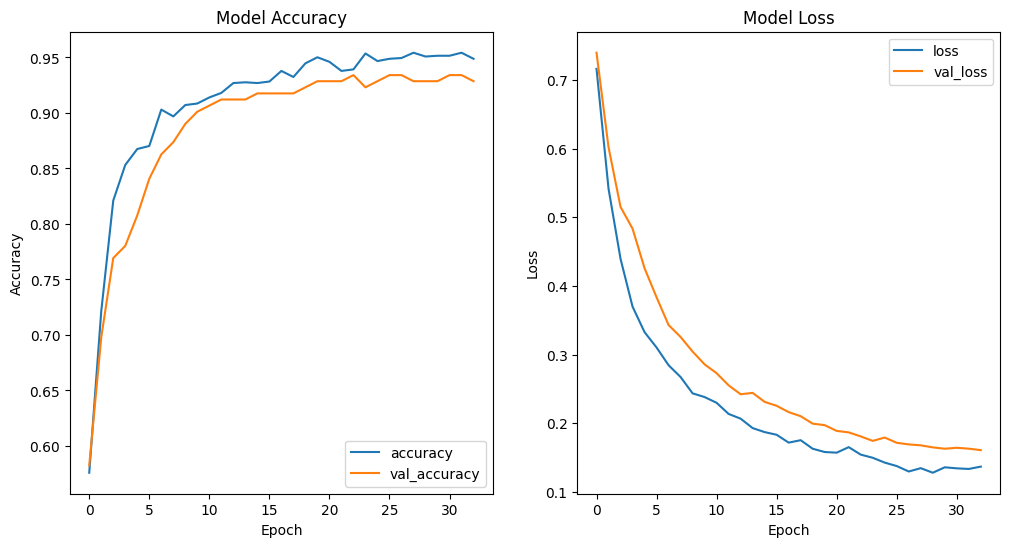

In [ ]:
# Plotting accuracy and loss Initial Training
plt.figure(figsize=(12, 6)) # Membuat figure baru dengan ukuran tertentu

# Plot accuracy
plt.subplot(1, 2, 1) # Membuat subplot 1x2, memilih subplot pertama
plt.plot(history.history['accuracy'], label='accuracy') # Plot akurasi training
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') # Plot akurasi validasi
plt.title('Model Accuracy') # Memberi judul plot
plt.xlabel('Epoch') # Memberi label sumbu x
plt.ylabel('Accuracy') # Memberi label sumbu y
plt.legend(loc='lower right') # Menampilkan legenda

# Plot loss
plt.subplot(1, 2, 2) # Membuat subplot 1x2, memilih subplot kedua
plt.plot(history.history['loss'], label='loss') # Plot loss training
plt.plot(history.history['val_loss'], label='val_loss') # Plot loss validasi
plt.title('Model Loss') # Memberi judul plot
plt.xlabel('Epoch') # Memberi label sumbu x
plt.ylabel('Loss') # Memberi label sumbu y
plt.legend(loc='upper right') # Menampilkan legenda

plt.show() # Menampilkan plot

**Menyimpan Model Setelah Training Awal/Initial Training**

In [ ]:
# Simpan model yang telah dilatih
model.save('C-frame80.h5')
print("Model telah disimpan ke file 'c-frame80.h5'")

Model telah disimpan ke file 'c-frame80.h5'


## Fine Tuning

In [ ]:
# Unfreeze some layers of the base model for fine-tuning
# It's common to unfreeze layers closer to the output
# Let's unfreeze the last few layers (e.g., the last few blocks)
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_from_layer = 100 # You might need to experiment with this value

for layer in base_model.layers[:fine_tune_from_layer]:
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

print("\nStarting fine-tuning...")

# Continue training (fine-tuning) the model
# Use the same data generators and callbacks
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100, # You might train for more epochs during fine-tuning
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

# Evaluate the fine-tuned model on validation data
val_loss_fine_tune, val_acc_fine_tune = model.evaluate(val_generator)
print(f'Validation accuracy after fine-tuning: {val_acc_fine_tune * 100:.2f}%')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Starting fine-tuning...
Epoch 1/100
45/45 - 28s - 630ms/step - accuracy: 0.9483 - loss: 0.1401 - val_accuracy: 0.9250 - val_loss: 0.1914 - learning_rate: 1.0000e-05
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


45/45 - 0s - 9ms/step - accuracy: 0.9688 - loss: 0.1032 - val_accuracy: 0.9250 - val_loss: 0.1911 - learning_rate: 1.0000e-05
Epoch 3/100
45/45 - 41s - 911ms/step - accuracy: 0.9490 - loss: 0.1453 - val_accuracy: 0.9312 - val_loss: 0.1845 - learning_rate: 1.0000e-05
Epoch 4/100
45/45 - 1s - 13ms/step - accuracy: 0.9688 - loss: 0.0920 - val_accuracy: 0.9438 - val_loss: 0.1616 - learning_rate: 1.0000e-05
Epoch 5/100
45/45 - 33s - 724ms/step - accuracy: 0.9462 - loss: 0.1498 - val_accuracy: 0.9375 - val_loss: 0.1754 - learning_rate: 1.0000e-05
Epoch 6/100
45/45 - 0s - 10ms/step - accuracy: 0.9688 - loss: 0.1348 - val_accuracy: 0.9250 - val_loss: 0.1944 - learning_rate: 1.0000e-05
Epoch 7/100
45/45 - 20s - 455ms/step - accuracy: 0.9490 - loss: 0.1456 - val_accuracy: 0.9250 - val_loss: 0.1891 - learning_rate: 1.0000e-05
Epoch 8/100
45/45 - 0s - 8ms/step - accuracy: 0.9688 - loss: 0.0905 - val_accuracy: 0.9250 - val_loss: 0.1925 - learning_rate: 1.0000e-05
Epoch 9/100
45/45 - 20s - 455ms/ste

**Visualisasi Akurasi & Loss Setelah Fine-Tuning**

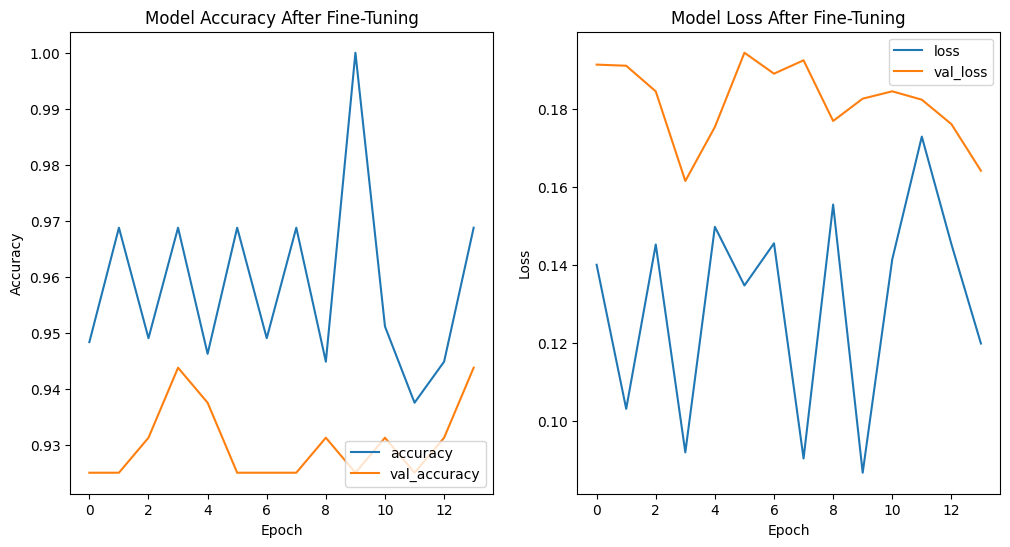

In [ ]:
# Plotting accuracy and loss after fine-tuning
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_fine_tune.history['accuracy'], label='accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model Accuracy After Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['loss'], label='loss')
plt.plot(history_fine_tune.history['val_loss'], label='val_loss')
plt.title('Model Loss After Fine-Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

**Menyimpan Model Setelah Fine Tuning**

In [ ]:
# Simpan model yang telah difine-tune
model.save('c-frame_fine_tuned.h5')
print("Model telah disimpan ke file 'c-frame_fine_tuned.h5'")

Model telah disimpan ke file 'c-frame_fine_tuned.h5'


## Evaluation With K-Fold

Merging Data

In [ ]:
# Direktori dataset hasil resize
resized_data_dir = '/kaggle/working/resized_images'

# Direktori train dan val yang sudah ada
train_dir = os.path.join(resized_data_dir, 'train')
val_dir = os.path.join(resized_data_dir, 'val')

# Direktori baru untuk data gabungan
combined_data_dir = os.path.join(resized_data_dir, 'combined')
os.makedirs(combined_data_dir, exist_ok=True)

# Daftar kelas (subfolder)
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]  # Mengambil daftar folder atau file

# Salin gambar dari train dan val ke direktori combined
for class_name in classes:
    combined_class_dir = os.path.join(combined_data_dir, class_name)
    os.makedirs(combined_class_dir, exist_ok=True)

    # Salin dari train
    train_class_dir = os.path.join(train_dir, class_name)
    for filename in os.listdir(train_class_dir):  # Mengambil daftar folder atau file
        shutil.copy(os.path.join(train_class_dir, filename), os.path.join(combined_class_dir, filename))

    # Salin dari val
    val_class_dir = os.path.join(val_dir, class_name)
    for filename in os.listdir(val_class_dir):  # Mengambil daftar folder atau file
        shutil.copy(os.path.join(val_class_dir, filename), os.path.join(combined_class_dir, filename))

print(f"Data dari '{train_dir}' dan '{val_dir}' telah digabungkan ke '{combined_data_dir}'")  # Menampilkan output ke konsol

Data dari '/kaggle/working/resized_images/train' dan '/kaggle/working/resized_images/val' telah digabungkan ke '/kaggle/working/resized_images/combined'


K-Fold With Confusion Matrix

In [ ]:
# Path ke direktori data gabungan
combined_data_dir = '/kaggle/working/resized_images/combined'

# Ukuran gambar dan batch size
img_size = 224 # Ukuran gambar
batch_size = 32
num_folds = 5  # Jumlah lipatan untuk cross-validation

# Data generator tanpa augmentasi untuk membaca gambar dari direktori
datagen = ImageDataGenerator(rescale=1./255) # Generator dengan penskalaan piksel

# Mendapatkan daftar file gambar dan label dari direktori gabungan
all_image_paths = [] # List path gambar
all_labels = [] # List label gambar
class_names = sorted(os.listdir(combined_data_dir)) # Nama-nama kelas (folder)
class_indices = {class_name: i for i, class_name in enumerate(class_names)} # Mapping nama kelas ke indeks numerik

for class_name in class_names: # Loop melalui setiap nama kelas
    class_dir = os.path.join(combined_data_dir, class_name) # Path ke direktori kelas
    if os.path.isdir(class_dir): # Memastikan itu adalah direktori
        for img_name in os.listdir(class_dir): # Loop melalui file di direktori kelas
            all_image_paths.append(os.path.join(class_dir, img_name)) # Menambahkan path gambar
            all_labels.append(class_indices[class_name]) # Menambahkan label numerik gambar

all_image_paths = np.array(all_image_paths) # Mengubah list path menjadi array numpy
all_labels = np.array(all_labels) # Mengubah list label menjadi array numpy

# Inisialisasi KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42) # Mengatur KFold

# Lists untuk menyimpan hasil evaluasi dari setiap fold
fold_accuracy = [] # List akurasi per fold
fold_loss = [] # List loss per fold

# Lists untuk menyimpan true labels dan predicted labels dari semua validation folds
all_val_true_labels = []
all_val_predicted_labels = []

# Loop untuk setiap fold
for fold, (train_index, val_index) in enumerate(kf.split(all_image_paths, all_labels)): # Loop melalui setiap pembagian fold
    print(f"===== Memulai Fold {fold+1}/{num_folds} =====") # Menampilkan nomor fold

    # Membagi data berdasarkan index train dan validation untuk fold saat ini
    train_paths, val_paths = all_image_paths[train_index], all_image_paths[val_index] # Membagi path gambar
    train_labels, val_labels = all_labels[train_index], all_labels[val_index] # Membagi label gambar

    # --- Pendekatan dengan membuat sub-direktori sementara per fold ---
    fold_base_dir = f'/kaggle/working/fold_{fold+1}' # Path dasar untuk direktori sementara fold
    train_fold_dir = os.path.join(fold_base_dir, 'train') # Path direktori train sementara
    val_fold_dir = os.path.join(fold_base_dir, 'val') # Path direktori val sementara

    # Bersihkan direktori sementara jika ada
    if os.path.exists(fold_base_dir): # Memeriksa apakah direktori sementara ada
        shutil.rmtree(fold_base_dir) # Menghapus direktori sementara
    os.makedirs(train_fold_dir, exist_ok=True) # Membuat direktori train sementara
    os.makedirs(val_fold_dir, exist_ok=True) # Membuat direktori val sementara

    # Salin gambar ke direktori sementara train dan val untuk fold ini
    for i, path in enumerate(train_paths): # Loop melalui path gambar train
        class_name = class_names[train_labels[i]] # Mendapatkan nama kelas
        dest_dir = os.path.join(train_fold_dir, class_name) # Membuat path tujuan
        os.makedirs(dest_dir, exist_ok=True) # Membuat direktori tujuan jika belum ada
        shutil.copy(path, os.path.join(dest_dir, os.path.basename(path))) # Menyalin gambar

    for i, path in enumerate(val_paths): # Loop melalui path gambar val
        class_name = class_names[val_labels[i]] # Mendapatkan nama kelas
        dest_dir = os.path.join(val_fold_dir, class_name) # Membuat path tujuan
        os.makedirs(dest_dir, exist_ok=True) # Membuat direktori tujuan jika belum ada
        shutil.copy(path, os.path.join(dest_dir, os.path.basename(path))) # Menyalin gambar

    # Buat generator dari direktori sementara fold
    train_fold_generator = datagen.flow_from_directory( # Membuat generator untuk data train fold
        train_fold_dir, # Direktori train sementara
        target_size=(img_size, img_size), # Ukuran target gambar
        batch_size=batch_size, # Ukuran batch
        class_mode='categorical', # Mode kelas (one-hot encoding)
        classes=class_names, # Nama-nama kelas
        shuffle=True # Pastikan data training diacak
    )

    val_fold_generator = datagen.flow_from_directory( # Membuat generator untuk data val fold
        val_fold_dir, # Direktori val sementara
        target_size=(img_size, img_size), # Ukuran target gambar
        batch_size=batch_size, # Ukuran batch
        class_mode='categorical', # Mode kelas (one-hot encoding)
        classes=class_names, # Nama-nama kelas
        shuffle=False # Penting: Jangan acak data validasi agar urutan sesuai label sebenarnya
    )

    # MODEL BUILDING (sama seperti sebelumnya, perlu diinisialisasi ulang untuk setiap fold)
    # Menggunakan arsitektur yang sama dengan fine-tuning (optional, bisa disesuaikan)
    base_model = MobileNetV2(input_shape=(img_size, img_size, 3), # Ukuran input model
                             include_top=False, # Tidak menyertakan layer top
                             weights='imagenet') # Menggunakan bobot ImageNet

    # Bekukan sebagian besar layer base model, hanya buka layer akhir untuk fine-tuning
    fine_tune_at = 100 # Sesuaikan jika perlu
    base_model.trainable = True
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False


    model = tf.keras.Sequential([ # Membuat model Sequential
        base_model, # Menambahkan base model
        layers.GlobalAveragePooling2D(), # Layer GlobalAveragePooling2D
        layers.Dropout(0.5), # Layer Dropout
        layers.Dense(128, activation='relu'), # Layer Dense dengan aktivasi ReLU
        layers.Dropout(0.3), # Layer Dropout
        layers.Dense(len(class_names), activation='softmax') # Layer Dense output dengan aktivasi Softmax
    ])

    # Compile model
    # Menggunakan learning rate yang lebih kecil untuk fine-tuning
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Training model untuk fold saat ini
    # Menggunakan epoch yang lebih sedikit untuk setiap fold agar tidak terlalu lama
    history = model.fit(
        train_fold_generator,
        epochs=10, # Epoch per fold, bisa disesuaikan
        validation_data=val_fold_generator,
        verbose=0 # Matikan verbose agar output lebih ringkas
    )

    # Evaluasi model pada data validation fold
    loss, accuracy = model.evaluate(val_fold_generator, verbose=0)
    print(f"Fold {fold+1} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    fold_loss.append(loss)
    fold_accuracy.append(accuracy)

    # Kumpulkan true labels dan predicted labels dari validation fold saat ini
    val_fold_generator.reset() # Reset generator untuk memastikan urutan yang konsisten
    Y_pred_fold = model.predict(val_fold_generator)
    y_pred_classes_fold = np.argmax(Y_pred_fold, axis=1)
    y_true_fold = val_fold_generator.classes

    all_val_true_labels.extend(y_true_fold)
    all_val_predicted_labels.extend(y_pred_classes_fold)


    # Bersihkan direktori sementara fold
    shutil.rmtree(fold_base_dir)

# Menampilkan hasil rata-rata dan standar deviasi dari cross-validation
print("\n===== Hasil Rata-rata Cross-Validation =====")
print(f"Rata-rata Akurasi: {np.mean(fold_accuracy):.4f} (+/- {np.std(fold_accuracy):.4f})")
print(f"Rata-rata Loss: {np.mean(fold_loss):.4f} (+/- {np.std(fold_loss):.4f})")

# Variabel all_val_true_labels dan all_val_predicted_labels sekarang berisi data dari semua fold

===== Memulai Fold 1/5 =====
Found 1316 images belonging to 2 classes.
Found 330 images belonging to 2 classes.
Fold 1 - Loss: 0.1197, Accuracy: 0.9576
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step
===== Memulai Fold 2/5 =====
Found 1317 images belonging to 2 classes.
Found 329 images belonging to 2 classes.
Fold 2 - Loss: 0.0913, Accuracy: 0.9696
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step
===== Memulai Fold 3/5 =====
Found 1317 images belonging to 2 classes.
Found 329 images belonging to 2 classes.
Fold 3 - Loss: 0.0949, Accuracy: 0.9635
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step
===== Memulai Fold 4/5 =====
Found 1317 images belonging to 2 classes.
Found 329 images belonging to 2 classes.
Fold 4 - Loss: 0.0852, Accuracy: 0.9818
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 387ms/step
===== Memulai Fold 5/5 =====
Found 1317 images belonging to 2 classes.
Found 329 images belonging to 2 classes.
Fold 5 - Loss: 0.1498, Accuracy: 0.9331
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step

===== Hasil Rata-rata Cross-Valida

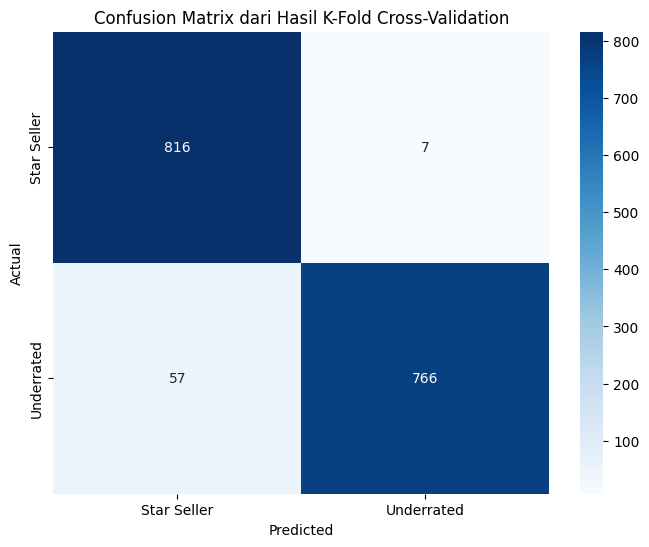


Classification Report dari Hasil K-Fold Cross-Validation:
              precision    recall  f1-score   support

 Star Seller       0.93      0.99      0.96       823
  Underrated       0.99      0.93      0.96       823

    accuracy                           0.96      1646
   macro avg       0.96      0.96      0.96      1646
weighted avg       0.96      0.96      0.96      1646



In [ ]:
# Menggabungkan true labels dan predicted labels dari semua fold
# Variabel all_val_true_labels dan all_val_predicted_labels diisi di cell K-Fold sebelumnya
final_true_labels = np.array(all_val_true_labels)
final_predicted_labels = np.array(all_val_predicted_labels)

# Menghitung Confusion Matrix dari data gabungan
# class_names didapatkan dari cell K-Fold sebelumnya (pada cell b49fb0ba)
cm_kfold = confusion_matrix(final_true_labels, final_predicted_labels)

# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_kfold, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix dari Hasil K-Fold Cross-Validation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Tampilkan Classification Report dari data gabungan
print("\nClassification Report dari Hasil K-Fold Cross-Validation:")
print(classification_report(final_true_labels, final_predicted_labels, target_names=class_names))

## Inference

Test With New Image Out Of Dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Gambar diprediksi sebagai: Underrated
Confidence: 99.98%


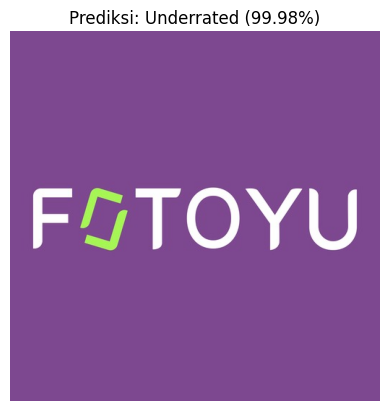

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load model yang telah dilatih
model = load_model('/content/c-frame_fine_tuned.h5') # Ganti dengan nama file model Anda jika berbeda

# Path ke gambar yang ingin diuji
image_path = '/content/1.jpg' # Ganti dengan path gambar Anda

# Load dan preprocess gambar
img = load_img(image_path, target_size=(224, 224)) # Sesuaikan dengan ukuran input model
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Menambahkan dimensi batch
img_array /= 255. # Normalisasi

# Melakukan prediksi
prediction = model.predict(img_array)

# Menampilkan hasil prediksi
# Pastikan urutan class_names sesuai dengan urutan saat training
class_names = ['Star Seller', 'Underrated']
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction)

print(f'Gambar diprediksi sebagai: {predicted_class}')
print(f'Confidence: {confidence * 100:.2f}%')

# Menampilkan gambar
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f'Prediksi: {predicted_class} ({confidence * 100:.2f}%)')
plt.axis('off')
plt.show()